In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

column_names = ['breed','color','weigt','age','adoption']
dataset = pd.read_csv('(0814)dog_info_final(6).csv',names=column_names)

#scaler 적용
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = MaxAbsScaler()

dataset[['breed','color','weigt','age']] = scaler1.fit_transform(dataset[['breed','color','weigt','age']])
#sns.pairplot(dataset, hue='adoption')
#plt.show()

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

    ##y값의 활성화 함수 적용
data = dataset.values
X=data[:,0:4].astype(float)
Y_obj = data[:,4]

#학습셋과 테스트셋의 구분
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X,Y_obj,test_size=0.2,random_state=seed)
print(Y_valtest.shape)

# Fitting SVR to the dataset
from sklearn.svm import SVR
polysvr = SVR(kernel="poly", degree=2, gamma=1, coef0=0).fit(X, Y_obj)
rbfsvr = SVR(kernel="rbf").fit(X, Y_obj)
sigmoidsvr = SVR(kernel="sigmoid", gamma=2, coef0=2).fit(X, Y_obj)

Y_valtest_pred = rbfsvr.predict(X_valtest)
mse = mean_squared_error(Y_valtest,Y_valtest_pred)
evs = explained_variance_score(Y_valtest,Y_valtest_pred)
r2 = rbfsvr.score(X_valtest,Y_valtest)
print("\n###Performance ####")
print("Mean squared error =",round(mse,2))
print("Explained variance score =",round(evs,2))
print("r2squre =",round(r2,2))

'''머신러닝 시도

## Y차원 늘린후 0 or 1로 만들기 : one-hot-encoding
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)


# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(2, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''


(1766,)

###Performance ####
Mean squared error = 0.22
Explained variance score = 0.04
r2squre = -0.07


'머신러닝 시도\n\n## Y차원 늘린후 0 or 1로 만들기 : one-hot-encoding\ne = LabelEncoder()\ne.fit(Y_obj)\nY = e.transform(Y_obj)\nY_encoded = np_utils.to_categorical(Y)\n\n\n# define base model\ndef baseline_model():\n\t# create model\n\tmodel = Sequential()\n\tmodel.add(Dense(128, input_dim=4, kernel_initializer=\'normal\', activation=\'relu\'))\n\tmodel.add(Dense(2, kernel_initializer=\'normal\'))\n\t# Compile model\n\tmodel.compile(loss=\'mean_squared_error\', optimizer=\'adam\')\n\treturn model\n\n# evaluate model\nestimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)\nkfold = KFold(n_splits=10)\nresults = cross_val_score(estimator, X_train, Y_train, cv=kfold)\nprint("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))\n'

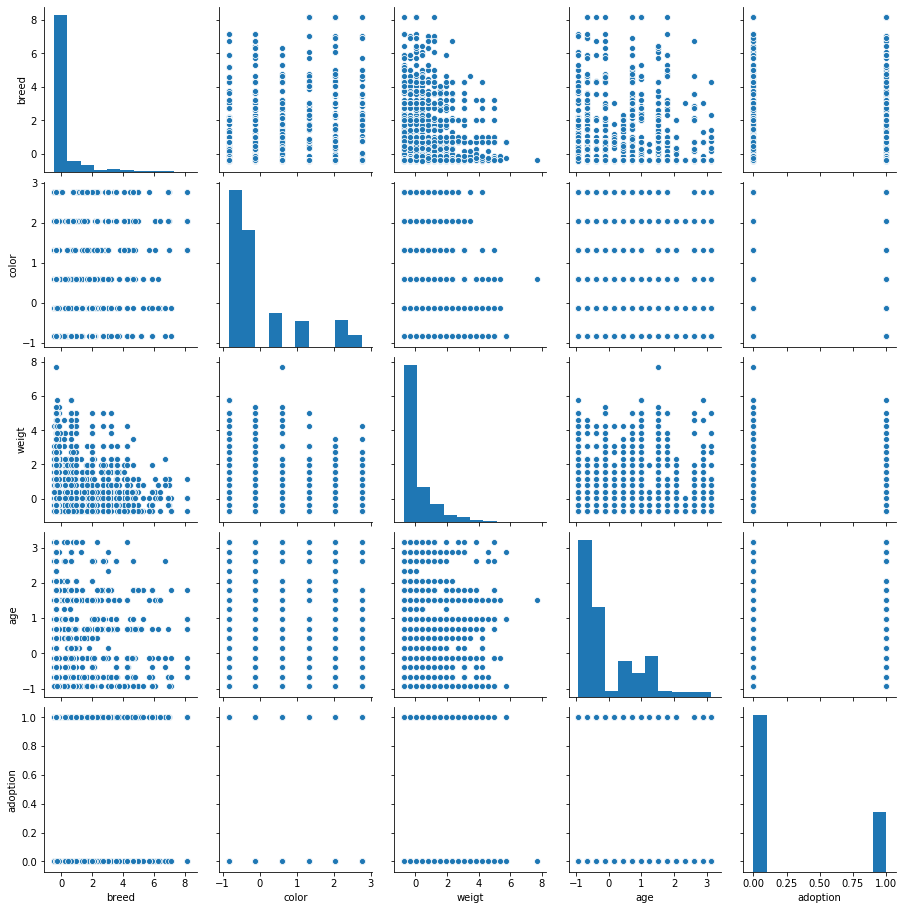

(1766,)

###Performance ####
Mean squared error = 0.22
Explained variance score = 0.04
r2squre = -0.07


In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

column_names = ['breed','color','weigt','age','adoption']
dataset = pd.read_csv('(0814)dog_info_final(6).csv',names=column_names)

#scaler 적용
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = MaxAbsScaler()

dataset[['breed','color','weigt','age']] = scaler1.fit_transform(dataset[['breed','color','weigt','age']])
sns.pairplot(dataset)
plt.show()

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

    ##y값의 활성화 함수 적용
data = dataset.values
X=data[:,0:4].astype(float)
Y_obj = data[:,4]

#학습셋과 테스트셋의 구분
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X,Y_obj,test_size=0.2,random_state=seed)
print(Y_valtest.shape)

# Fitting SVR to the dataset
from sklearn.svm import SVR
polysvr = SVR(kernel="poly", degree=2, gamma=1, coef0=0).fit(X, Y_obj)
rbfsvr = SVR(kernel="rbf").fit(X, Y_obj)
sigmoidsvr = SVR(kernel="sigmoid", gamma=2, coef0=2).fit(X, Y_obj)

Y_valtest_pred = rbfsvr.predict(X_valtest)
mse = mean_squared_error(Y_valtest,Y_valtest_pred)
evs = explained_variance_score(Y_valtest,Y_valtest_pred)
r2 = rbfsvr.score(X_valtest,Y_valtest)
print("\n###Performance ####")
print("Mean squared error =",round(mse,2))
print("Explained variance score =",round(evs,2))
print("r2squre =",round(r2,2))



             breed     color     weigt       age  adoption
breed     1.000000  0.210976  0.188222  0.110724  0.116597
color     0.210976  1.000000  0.202789  0.005853 -0.059415
weigt     0.188222  0.202789  1.000000  0.007691 -0.062920
age       0.110724  0.005853  0.007691  1.000000  0.004469
adoption  0.116597 -0.059415 -0.062920  0.004469  1.000000


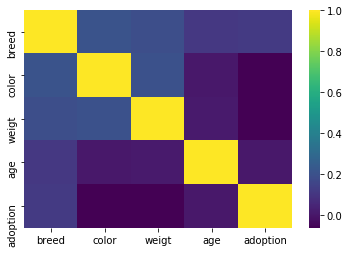

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##########데이터 로드

df_train = dataset

##########데이터 분석

df_corr = df_train.corr()
print(df_corr)
'''
               hours  attendance  exam_score
hours       1.000000    0.755555    0.926371
attendance  0.755555    1.000000    0.856456
exam_score  0.926371    0.856456    1.000000
'''

sns.heatmap(df_corr, cmap='viridis')
plt.show()